<a href="https://colab.research.google.com/github/Ahmadtito17/Machine_Learning/blob/main/Kuis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama    : Ahmad Tito N.H

NIM     : 2141720265

Kelas   : TI-3G

___________________________________________________________________________

**KUIS 1 - MACHINE LEARNING**

___________________________________________________________________________

**NAIVE BAYES**

___________________________________________________________________________

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

**1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!**

Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


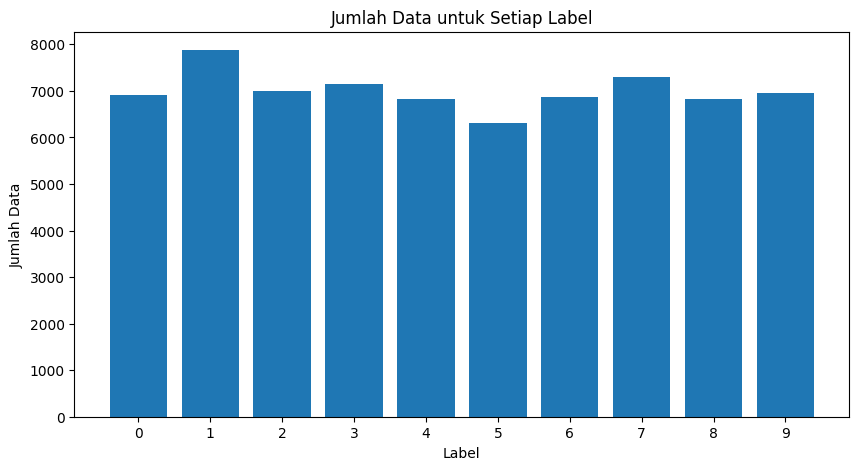

In [5]:
# Mengambil label dan fitur dari dataset (asumsi Anda telah memuat dataset MNIST sebelumnya)
X = mnist.data
y = mnist.target

# Menghitung jumlah data untuk setiap label
label_counts = np.bincount(y)

# Menampilkan jumlah data untuk setiap label
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} data")

# Membuat diagram batang

plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data untuk Setiap Label')
plt.show()

In [6]:
# total data
total_data = len(y)

# Menampilkan presentase jumlah data untuk setiap label
for label, count in enumerate(label_counts):
    percentage = (count / total_data) * 100
    print(f"Label {label}: {count} data ({percentage:.2f}%) dari total")

Label 0: 6903 data (9.86%) dari total
Label 1: 7877 data (11.25%) dari total
Label 2: 6990 data (9.99%) dari total
Label 3: 7141 data (10.20%) dari total
Label 4: 6824 data (9.75%) dari total
Label 5: 6313 data (9.02%) dari total
Label 6: 6876 data (9.82%) dari total
Label 7: 7293 data (10.42%) dari total
Label 8: 6825 data (9.75%) dari total
Label 9: 6958 data (9.94%) dari total


**2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.**

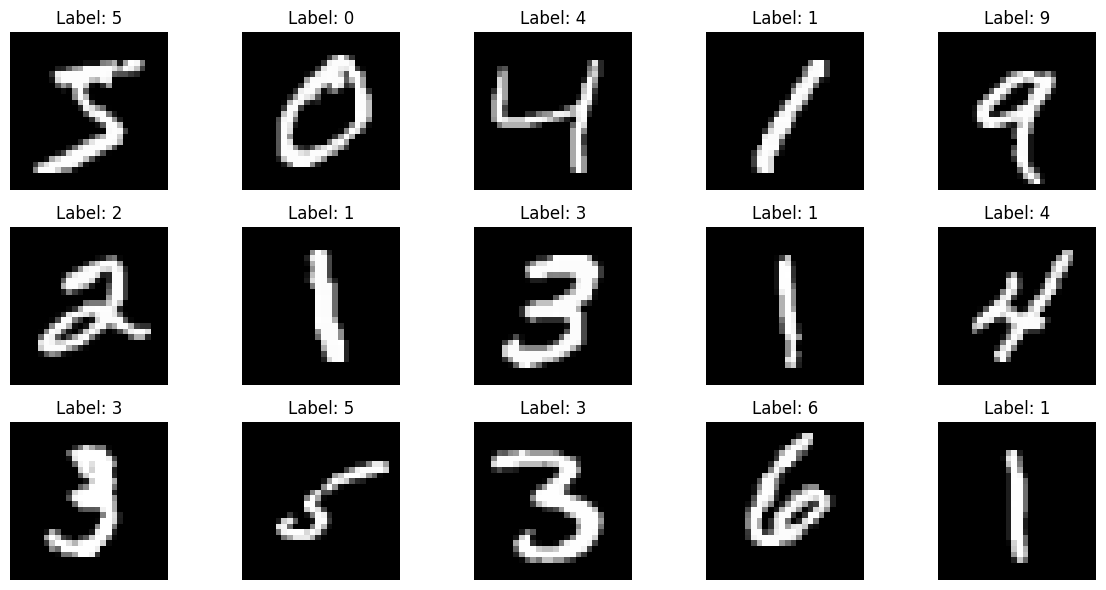

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
for i in range(15):
    # Konversi objek pandas.Series menjadi array NumPy di dalam loop
    X_array = X.iloc[i].values.reshape(28, 28)

    plt.subplot(3, 5, i + 1)  # Mengganti jumlah kolom menjadi 4
    plt.imshow(X_array, cmap="gray")
    plt.title(f"Label: {y.iloc[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

**3. Lakukan proses ekstraksi fitur pada data MNIST.**

In [8]:
# Menggunakan PCA untuk ekstraksi fitur
n_components = 50  # Jumlah komponen PCA yang akan diambil
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print("Shape of X_pca: ", X_pca.shape)

# Sekarang, X_pca berisi fitur-fitur yang diekstraksi menggunakan PCA
# Anda dapat menggunakan X_pca sebagai input untuk model klasifikasi Anda.

Shape of X_pca:  (70000, 50)


**4. Buatlah data training dan data testing**

**SPLIT 70 : 30**

In [9]:
# Pemisahan data dengan rasio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Rasio 70:30")

Rasio 70:30


In [10]:
# mengimpor library scikit-learn (StandardScaler) untuk menormalkan fitur-fitur dengan menghilangkan rata-rata
from sklearn.preprocessing import StandardScaler

#membuat objek dari StandardScaler
scaler = StandardScaler()

# menormalkan data dengan mengurangi rata-rata dan membagi dengan standar deviasi
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Training:", X_train.shape, y_train.shape)
print("Data Testing:", X_test.shape, y_test.shape)

Data Training: (49000, 784) (49000,)
Data Testing: (21000, 784) (21000,)


**5. Klasifikasi**

**Gaussian Naive Bayes**

In [11]:
# Membuat model Naive Bayes
nb_classifier = GaussianNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

**6. Evaluasi Model dengan Metric Accuracy, Fungsi Classification_Report, dan Confusion Matrix**

In [12]:
# Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [13]:
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")
print("")
print("-----------------------------------------------------")
print("")
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")

Naive Bayes (Training) Accuracy: 0.5272040816326531 = 52.72%
Naive Bayes (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.95      0.73      4845
           1       0.82      0.94      0.88      5513
           2       0.88      0.23      0.36      4857
           3       0.74      0.27      0.39      4965
           4       0.79      0.07      0.13      4888
           5       0.57      0.02      0.04      4398
           6       0.65      0.93      0.77      4788
           7       0.91      0.24      0.37      5045
           8       0.29      0.60      0.39      4833
           9       0.36      0.96      0.52      4868

    accuracy                           0.53     49000
   macro avg       0.66      0.52      0.46     49000
weighted avg       0.66      0.53      0.47     49000

Naive Bayes (Training) Confusion Matrix:
[[4583    6   18   10    6    9   58    2   80   73]
 [   7 5156    9   22    3    6   71    

**7. Tampilkan citra data testing berserta hasil pelabelannya.**

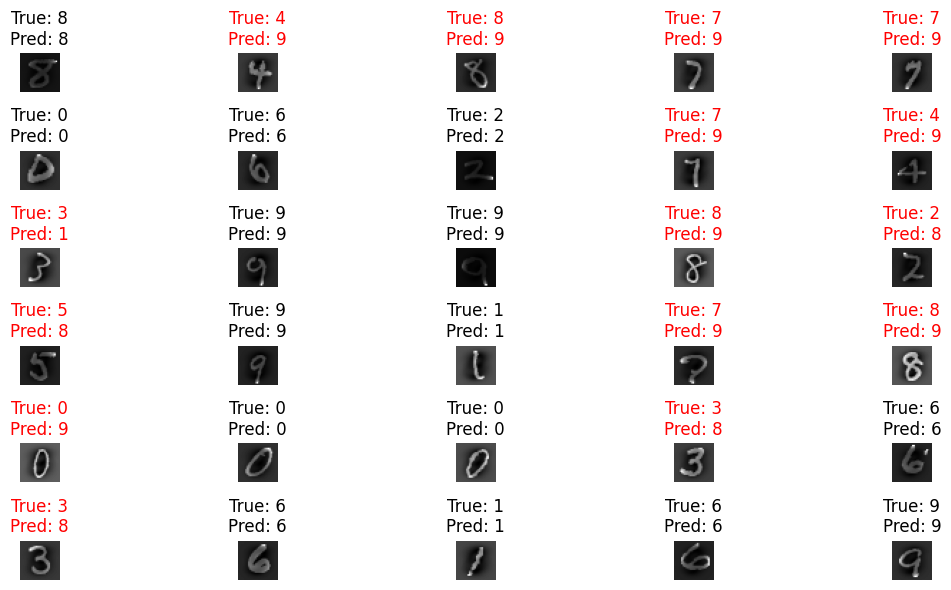

In [14]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels.iloc[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels.iloc[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

**SPLIT 80 : 20**

In [15]:
# Pemisahan data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Rasio 80:20")

Rasio 80:20


In [16]:
# mengimpor library scikit-learn (StandardScaler) untuk menormalkan fitur-fitur dengan menghilangkan rata-rata
from sklearn.preprocessing import StandardScaler

#membuat objek dari StandardScaler
scaler = StandardScaler()

# menormalkan data dengan mengurangi rata-rata dan membagi dengan standar deviasi
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Training:", X_train.shape, y_train.shape)
print("Data Testing:", X_test.shape, y_test.shape)

Data Training: (56000, 784) (56000,)
Data Testing: (14000, 784) (14000,)


In [17]:
# Membuat model Naive Bayes
nb_classifier = GaussianNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [24]:
#Evaluasi model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [19]:
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")
print("")
print("-----------------------------------------------------")
print("")
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")

Naive Bayes (Training) Accuracy: 0.5261428571428571 = 52.61%
Naive Bayes (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.93      0.77      5560
           1       0.85      0.93      0.89      6277
           2       0.87      0.22      0.35      5610
           3       0.71      0.27      0.39      5708
           4       0.81      0.08      0.14      5529
           5       0.51      0.02      0.04      5040
           6       0.67      0.93      0.78      5480
           7       0.92      0.23      0.37      5790
           8       0.27      0.63      0.37      5468
           9       0.35      0.96      0.52      5538

    accuracy                           0.53     56000
   macro avg       0.66      0.52      0.46     56000
weighted avg       0.67      0.53      0.47     56000

Naive Bayes (Training) Confusion Matrix:
[[5145    5   19   20    7   11   73    2  165  113]
 [   5 5848   13   22    3    7   73    

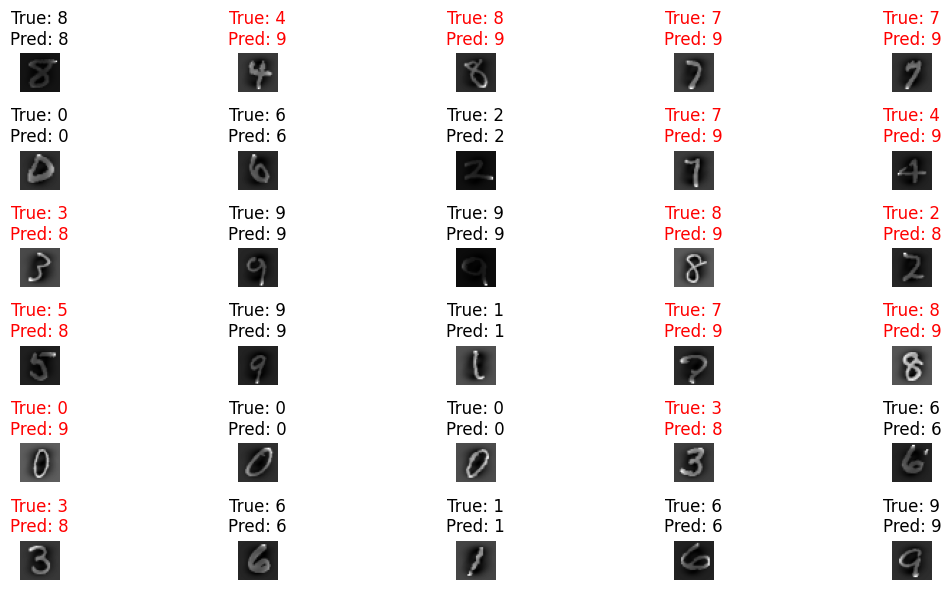

In [20]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
# X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels.iloc[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels.iloc[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

**SPLIT 90 : 10**

In [21]:
# Pemisahan data dengan rasio 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Rasio 90:10")

Rasio 90:10


In [22]:
# mengimpor library scikit-learn (StandardScaler) untuk menormalkan fitur-fitur dengan menghilangkan rata-rata
from sklearn.preprocessing import StandardScaler

#membuat objek dari StandardScaler
scaler = StandardScaler()

# menormalkan data dengan mengurangi rata-rata dan membagi dengan standar deviasi
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Training:", X_train.shape, y_train.shape)
print("Data Testing:", X_test.shape, y_test.shape)

Data Training: (63000, 784) (63000,)
Data Testing: (7000, 784) (7000,)


In [23]:
# Membuat model Naive Bayes
nb_classifier = GaussianNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [25]:
#Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [26]:
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")
print("")
print("-----------------------------------------------------")
print("")
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")

Naive Bayes (Training) Accuracy: 0.5327142857142857 = 53.27%
Naive Bayes (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      6220
           1       0.84      0.93      0.89      7077
           2       0.88      0.22      0.36      6316
           3       0.70      0.29      0.41      6381
           4       0.82      0.10      0.18      6213
           5       0.51      0.03      0.05      5655
           6       0.67      0.93      0.78      6199
           7       0.91      0.24      0.38      6569
           8       0.26      0.67      0.38      6132
           9       0.37      0.95      0.53      6238

    accuracy                           0.53     63000
   macro avg       0.67      0.53      0.47     63000
weighted avg       0.68      0.53      0.48     63000

Naive Bayes (Training) Confusion Matrix:
[[5495    6   22   24    9   11  124    3  395  131]
 [   4 6613   12   25    3   10   75    

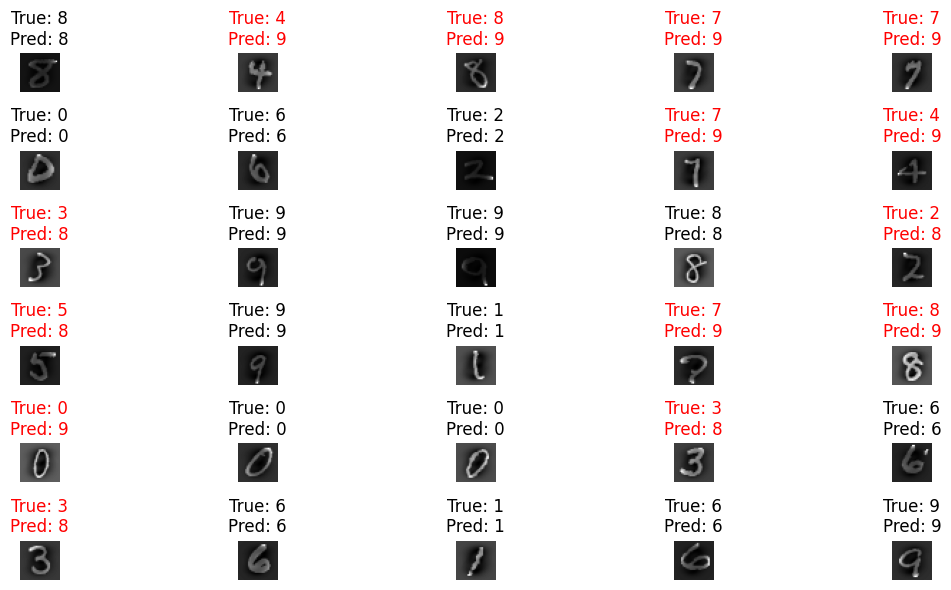

In [27]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
# X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels.iloc[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels.iloc[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

**SVM**

___________________________________________________________________________

In [28]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [30]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [31]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

**1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!**

Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


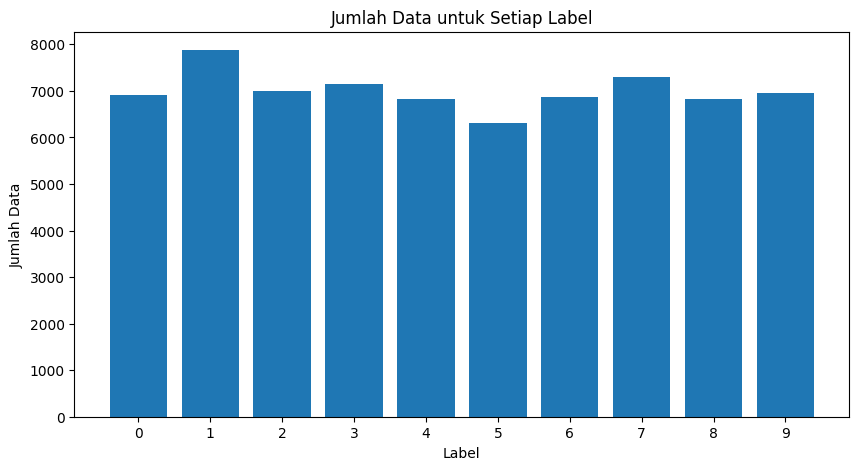

In [32]:
# Mengambil label dan fitur dari dataset (asumsi Anda telah memuat dataset MNIST sebelumnya)
X = mnist.data.to_numpy()
y = mnist.target.astype(int)

# Menghitung jumlah data untuk setiap label
label_counts = np.bincount(y)

# Menampilkan jumlah data untuk setiap label
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} data")

# Membuat diagram batang

plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data untuk Setiap Label')
plt.show()

In [33]:
# total data
total_data = len(y)

# Menampilkan presentase jumlah data untuk setiap label
for label, count in enumerate(label_counts):
    percentage = (count / total_data) * 100
    print(f"Label {label}: {count} data ({percentage:.2f}%) dari total")

Label 0: 6903 data (9.86%) dari total
Label 1: 7877 data (11.25%) dari total
Label 2: 6990 data (9.99%) dari total
Label 3: 7141 data (10.20%) dari total
Label 4: 6824 data (9.75%) dari total
Label 5: 6313 data (9.02%) dari total
Label 6: 6876 data (9.82%) dari total
Label 7: 7293 data (10.42%) dari total
Label 8: 6825 data (9.75%) dari total
Label 9: 6958 data (9.94%) dari total


**2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.**

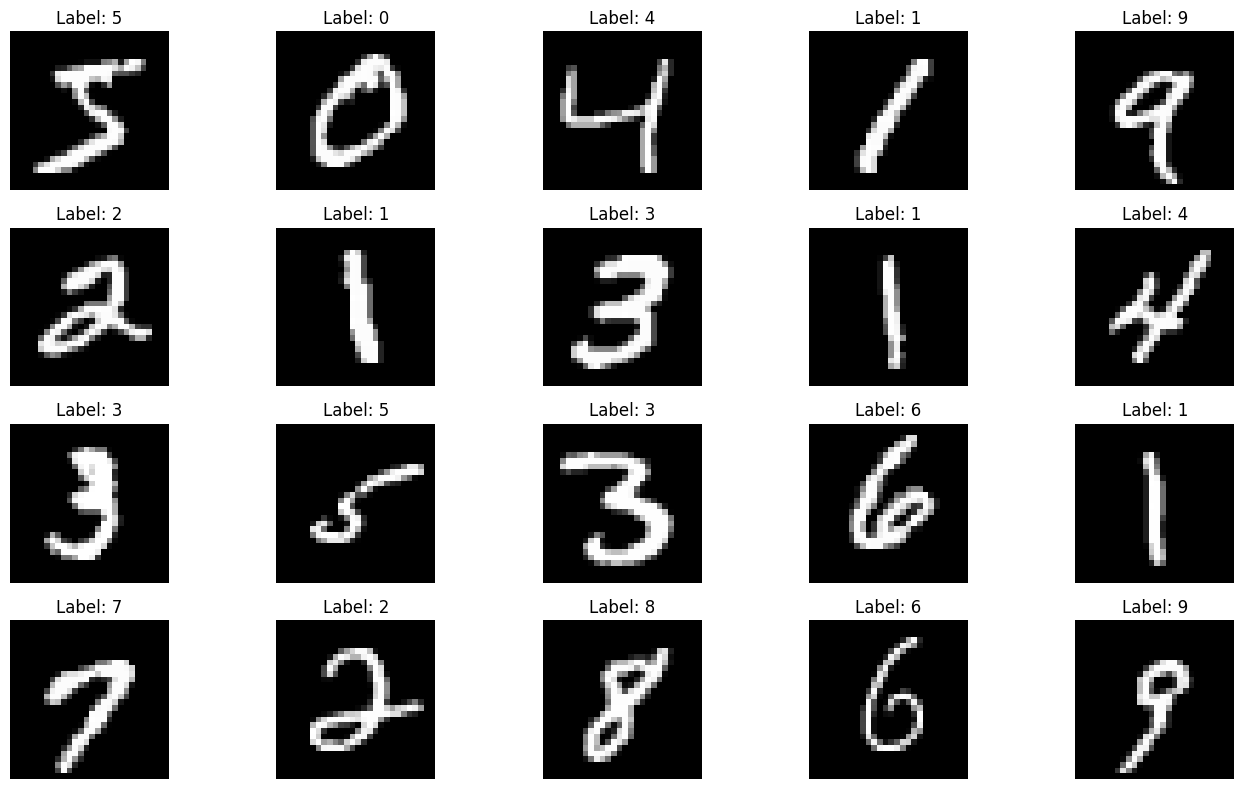

In [34]:
# Menampilkan 15 citra pertama
plt.figure(figsize=(14, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

**3. Lakukan proses ekstraksi fitur pada data MNIST.**

In [35]:
# Menggunakan PCA untuk ekstraksi fitur
n_components = 50  # Jumlah komponen PCA yang akan diambil
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print("Shape of X_pca: ", X_pca.shape)

# Sekarang, X_pca berisi fitur-fitur yang diekstraksi menggunakan PCA
# Anda dapat menggunakan X_pca sebagai input untuk model klasifikasi Anda.

Shape of X_pca:  (70000, 50)


**4. Buatlah data training dan data testing**

**SPLIT 70 : 30**

In [36]:
# Pemisahan data dengan rasio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Rasio 70:30")

Rasio 70:30


In [37]:
#membuat objek dari StandardScaler
minmax = MinMaxScaler()

# menormalkan data dengan mengurangi rata-rata dan membagi dengan standar deviasi
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

print("Data Training:", X_train.shape, y_train.shape)
print("Data Testing:", X_test.shape, y_test.shape)

Data Training: (49000, 784) (49000,)
Data Testing: (21000, 784) (21000,)


**5. Klasifikasi**

**SVM**

In [38]:
# membuat model SVM dengan kernel linear dan parameter default
svm = SVC(kernel="linear")

# Melatih model pada data training
svm.fit(X_train, y_train)

# Melakukan prediksi pada data training dan testing
svm_train_preds = svm.predict(X_train)
svm_test_preds = svm.predict(X_test)

**6. Evaluasi Model dengan Metric Accuracy, Fungsi Classification_Report, dan Confusion Matrix**

In [39]:
# Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [40]:
evaluate_model(y_train, svm_train_preds, "SVM (Training)")
print("")
print("-----------------------------------------------------")
print("")
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")

SVM (Training) Accuracy: 0.9740408163265306 = 97.40%
SVM (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4845
           1       0.98      1.00      0.99      5513
           2       0.97      0.97      0.97      4857
           3       0.96      0.96      0.96      4965
           4       0.97      0.98      0.97      4888
           5       0.96      0.95      0.96      4398
           6       0.99      0.99      0.99      4788
           7       0.98      0.97      0.98      5045
           8       0.97      0.96      0.96      4833
           9       0.96      0.95      0.96      4868

    accuracy                           0.97     49000
   macro avg       0.97      0.97      0.97     49000
weighted avg       0.97      0.97      0.97     49000

SVM (Training) Confusion Matrix:
[[4826    0    1    1    1    7    3    0    6    0]
 [   1 5491    4    1    0    1    0    2   12    1]
 [   4    7

**7. Tampilkan citra data testing berserta hasil pelabelannya.**

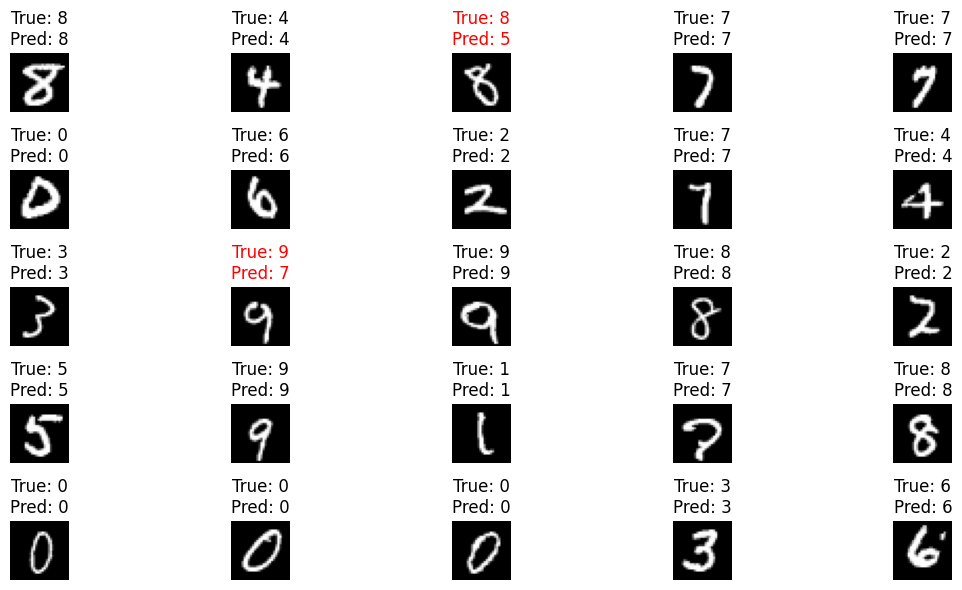

In [41]:
import pandas as pd

# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 25

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_labels = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    predicted_labels = svm_test_preds.iloc[i] if isinstance(svm_test_preds, pd.Series) else svm_test_preds[i]

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels == predicted_labels:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels}\nPred: {predicted_labels}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

**SPLIT 80 : 20**

In [42]:
# Pemisahan data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Rasio 80:20")

Rasio 80:20


In [43]:
#membuat objek dari StandardScaler
minmax = MinMaxScaler()

# menormalkan data dengan mengurangi rata-rata dan membagi dengan standar deviasi
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

print("Data Training:", X_train.shape, y_train.shape)
print("Data Testing:", X_test.shape, y_test.shape)

Data Training: (56000, 784) (56000,)
Data Testing: (14000, 784) (14000,)


In [44]:
# membuat model SVM dengan kernel linear dan parameter default
svm = SVC(kernel="linear")

# Melatih model pada data training
svm.fit(X_train, y_train)

# Melakukan prediksi pada data training dan testing
svm_train_preds = svm.predict(X_train)
svm_test_preds = svm.predict(X_test)

In [45]:
# Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [46]:
evaluate_model(y_train, svm_train_preds, "SVM (Training)")
print("")
print("-----------------------------------------------------")
print("")
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")

SVM (Training) Accuracy: 0.972 = 97.20%
SVM (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5560
           1       0.98      1.00      0.99      6277
           2       0.97      0.97      0.97      5610
           3       0.95      0.96      0.96      5708
           4       0.97      0.98      0.98      5529
           5       0.96      0.95      0.96      5040
           6       0.99      0.99      0.99      5480
           7       0.97      0.97      0.97      5790
           8       0.97      0.95      0.96      5468
           9       0.96      0.95      0.96      5538

    accuracy                           0.97     56000
   macro avg       0.97      0.97      0.97     56000
weighted avg       0.97      0.97      0.97     56000

SVM (Training) Confusion Matrix:
[[5534    0    2    2    0   10    4    0    8    0]
 [   1 6254    7    1    0    1    0    2   10    1]
 [   9   15 5457   31   

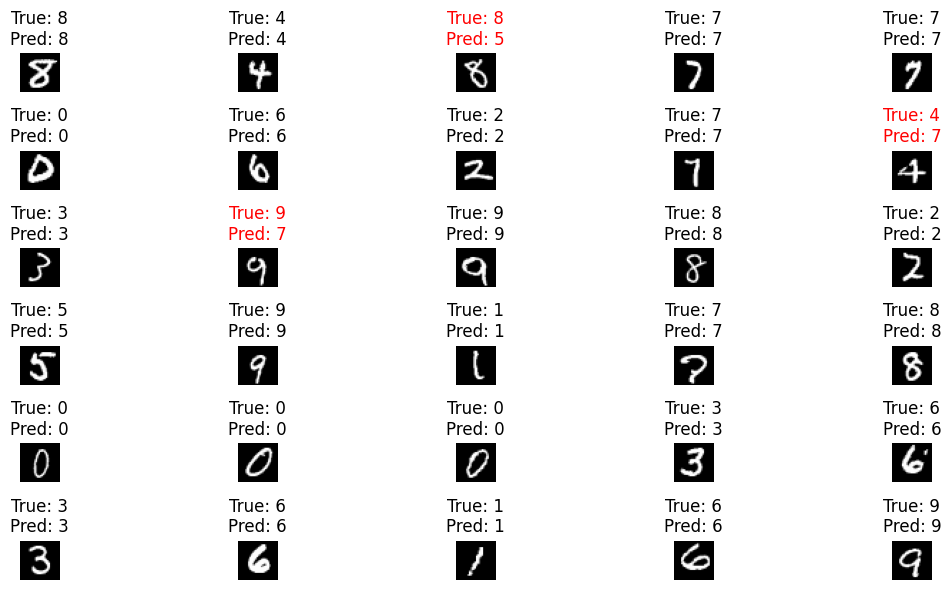

In [47]:
import pandas as pd

# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_labels = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    predicted_labels = svm_test_preds.iloc[i] if isinstance(svm_test_preds, pd.Series) else svm_test_preds[i]

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels == predicted_labels:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels}\nPred: {predicted_labels}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

**SPLIT 90 : 10**

In [48]:
# Pemisahan data dengan rasio 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Rasio 90:10")

Rasio 90:10


In [49]:
#membuat objek dari StandardScaler
minmax = MinMaxScaler()

# menormalkan data dengan mengurangi rata-rata dan membagi dengan standar deviasi
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

print("Data Training:", X_train.shape, y_train.shape)
print("Data Testing:", X_test.shape, y_test.shape)

Data Training: (63000, 784) (63000,)
Data Testing: (7000, 784) (7000,)


In [50]:
# membuat model SVM dengan kernel linear dan parameter default
svm = SVC(kernel="linear")

# Melatih model pada data training
svm.fit(X_train, y_train)

# Melakukan prediksi pada data training dan testing
svm_train_preds = svm.predict(X_train)
svm_test_preds = svm.predict(X_test)

In [51]:
# Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [52]:
evaluate_model(y_train, svm_train_preds, "SVM (Training)")
print("")
print("-----------------------------------------------------")
print("")
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")

SVM (Training) Accuracy: 0.9707142857142858 = 97.07%
SVM (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6220
           1       0.98      1.00      0.99      7077
           2       0.96      0.97      0.97      6316
           3       0.95      0.96      0.96      6381
           4       0.97      0.98      0.97      6213
           5       0.96      0.95      0.95      5655
           6       0.99      0.99      0.99      6199
           7       0.97      0.97      0.97      6569
           8       0.97      0.95      0.96      6132
           9       0.96      0.95      0.96      6238

    accuracy                           0.97     63000
   macro avg       0.97      0.97      0.97     63000
weighted avg       0.97      0.97      0.97     63000

SVM (Training) Confusion Matrix:
[[6190    0    2    2    0   11    4    0   11    0]
 [   1 7045   10    3    0    1    0    2   14    1]
 [  12   16

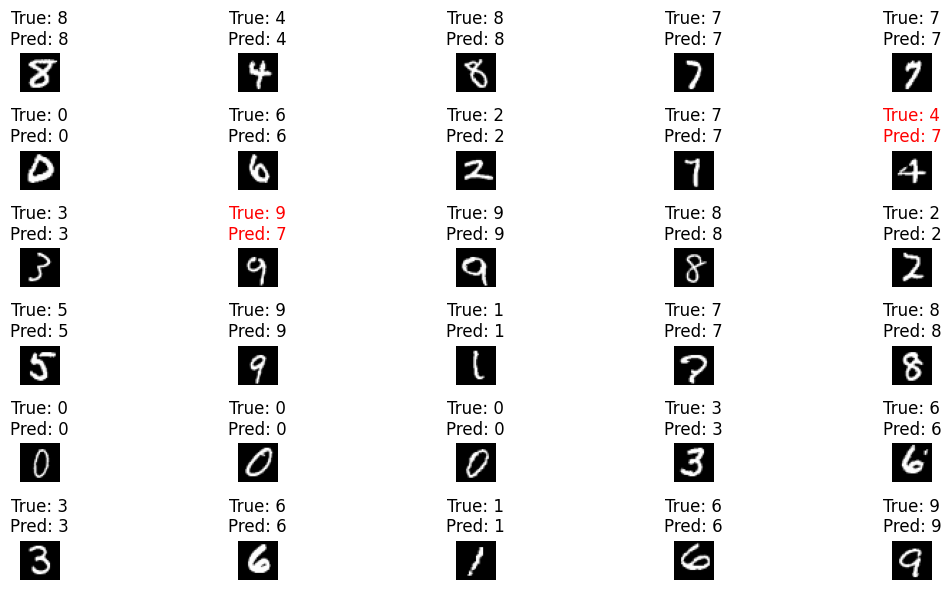

In [53]:
import pandas as pd

# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_labels = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    predicted_labels = svm_test_preds.iloc[i] if isinstance(svm_test_preds, pd.Series) else svm_test_preds[i]

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels == predicted_labels:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels}\nPred: {predicted_labels}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()